<div align="center">

# Prédiction de la souscription d'un dépôt à terme  

## Analyse exploratoire des données

<img src="https://raw.githubusercontent.com/komiadok/bank_client_segmentation/main/cover_image.jpg" alt="Segmentation de clients bancaires" width="500"/>

</div>

<div style="background-color:#008080; color:white; padding:15px; border-radius:8px; font-weight:bold; font-size:16px;">
📚 Chargement des librairies
</div>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

<div style="background-color:#008080; color:white; padding:15px; border-radius:8px; font-weight:bold; font-size:16px;">
🗃️ Partie 1 : Importation des données
</div>

In [2]:
data = pd.read_csv('dataset_preprocess.csv', sep = ',')

In [3]:
print(f'Taille du dataframe : {data.shape}')

Taille du dataframe : (41180, 35)


In [4]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,never_contacted,job_missing_flag,marital_missing_flag,education_missing_flag,default_missing_flag,housing_missing_flag,loan_missing_flag,duration_outlier_flag,campaign_outlier_flag,age_group
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,0,0,0,0,0,0,1,0,Préretraités
1,57,services,married,high.school,missing,no,no,telephone,may,mon,...,1,0,0,0,1,0,0,0,0,Préretraités
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,0,0,0,0,0,0,1,0,Actifs intermédiaires
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,0,0,0,0,0,0,0,0,Actifs intermédiaires
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,0,0,0,0,0,0,1,0,Préretraités


<div style="background-color:#008080; color:white; padding:15px; border-radius:8px; font-weight:bold; font-size:16px;">
🔗 Partie 2 : Croisement avec la variable target
</div>

### Classes d'âge vs Souscription

In [5]:
# Conversion de la variable y (yes/no) en binaire (yes=1, no=0)
data['y'] = data['y'].map({'no': 0, 'yes': 1})

In [6]:
# Calcul du taux de souscription par groupe d’âge
rate_data = (
    data.groupby('age_group')['y']
    .agg(subscription_rate='mean', effectif='size')  # calcule la moyenne et la taille
    .reset_index()
    .sort_values('subscription_rate', ascending=False)
    .reset_index(drop=True)
)
rate_data

,age_group,subscription_rate,effectif
0,Retraités avancés,0.520446,269
1,Retraités récents,0.439086,394
2,Jeunes débutants,0.238946,1063
3,Préretraités,0.135688,3567
4,Jeunes actifs,0.121739,13685
5,Actifs matures,0.086532,8702
6,Actifs intermédiaires,0.086519,13500


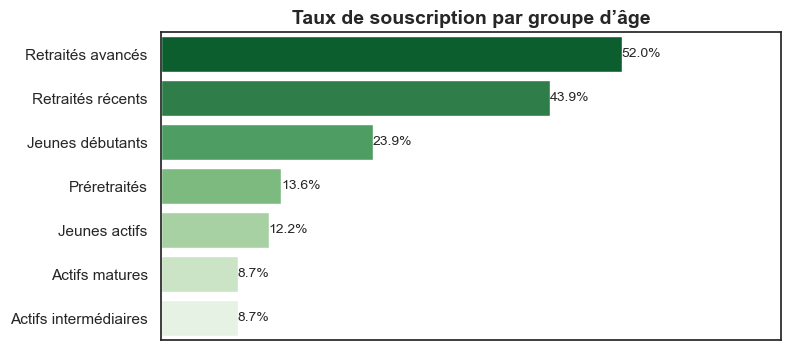

In [7]:
# Configuration du style sans grille
sns.set_theme(style="white")  # Style clair sans grilles

# Taille de la figure
plt.figure(figsize=(8, 4))

# Création d'une palette "Greens" inversée (du vert foncé au clair)
palette = sns.color_palette("Greens", n_colors=len(rate_data))
palette = palette[::-1]  # inverse la liste de couleurs

# Création du barplot
ax = sns.barplot(
    data=rate_data,
    y='age_group',
    x='subscription_rate',
    hue='age_group',       # Utilisation de la variable 'age_group' pour la couleur
    palette=palette,
    legend=False          
)

# Ajout des pourcentages sur les barres
for p in ax.patches:
    ax.annotate(f"{p.get_width()*100:.1f}%",                                       # Texte avec pourcentage formaté
                (p.get_x() + p.get_width(), p.get_y() + p.get_height()/2),         # Position à gauche de la barre
                ha='left', va='center', fontsize=10)                               # Alignement horizontal et vertical, taille du texte

# Titre du graphique avec style gras et taille de police
plt.title('Taux de souscription par groupe d’âge', fontsize=14, fontweight='bold')

plt.xlabel('')            # Suppression du label de l'axe X
plt.ylabel('')            # Suppression du label de l'axe Y
plt.xlim(0,0.7)           # Limites de l'axe X de 0 à 0.7 (0% à 70%)
plt.xticks([])            # Supprime les valeurs affichées sur l'axe X
plt.show()

**Observation**

Le graphique met en lumière que le segment des `Retraités avancés` (**75 ans et plus**) présente le taux de souscription le plus élevé aux dépôts à terme, avec **52 %**. Ils sont suivis par les `Retraités récents` (**65-74 ans**) affichant un taux de **43,9 %**. Le troisième groupe le plus important en termes de souscription est celui des `Jeunes débutants` (**18-24 ans**), avec un taux de **23,9 %**.<br>
À l’inverse, les `Actifs intermédiaires` (**35-44 ans**) et les `Actifs matures` (**45-54 ans**) enregistrent les taux de souscription les plus faibles, chacun à **8,7 %**.

**Interprétation**

Le fort taux de souscription observé chez les `Retraités récents` et les `Retraités récents` suggère que ces segments sont particulièrement réceptifs aux produits d’épargne à long terme comme les dépôts à terme. Cela peut s’expliquer par une recherche de sécurité et de rendement stable dans une phase de vie où le revenu est souvent fixe. Avec un taux de souscription de 23,9 %, les `Jeunes débutants` représentent également un segment intéressant, bien que leur propension à souscrire soit nettement inférieure à celle des retraités. Ce résultat peut refléter un début d’intérêt pour les produits d’épargne sécurisés, mais aussi des contraintes spécifiques telles que des revenus plus faibles. <br>
À l’inverse, les `Actifs intermédiaires` et les `Actifs matures` montrent une faible propension à souscrire, ce qui pourrait refléter une préférence pour d’autres types d’investissements ou une priorité différente en matière de gestion financière, notamment une plus grande prise de risque ou un horizon d’épargne plus flexible.

### Catégorie socio-professionnelle vs Souscription

In [8]:
# Calcul du taux de souscription par catégorie professionnelle
rate_data = (
    data.groupby('job')['y']
    .agg(subscription_rate='mean', effectif='size')  # calcule la moyenne et la taille
    .reset_index()
    .sort_values('subscription_rate', ascending=False)
    .reset_index(drop=True)
)
rate_data

,job,subscription_rate,effectif
0,student,0.313793,870
1,retired,0.252326,1720
2,unemployed,0.142152,1013
3,admin.,0.129726,10422
4,management,0.112175,2924
5,missing,0.112121,330
6,technician,0.108293,6741
7,self-employed,0.104856,1421
8,housemaid,0.100000,1060
9,entrepreneur,0.085165,1456


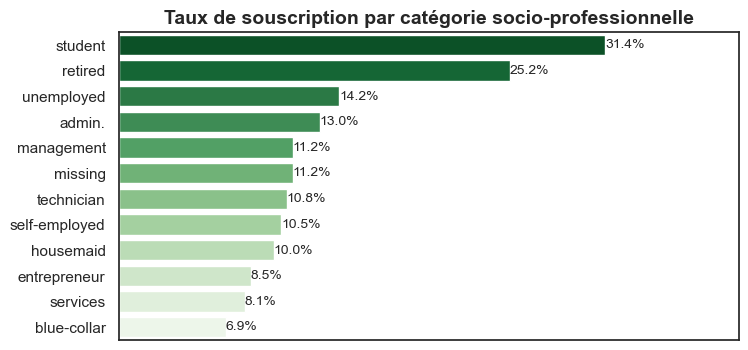

In [9]:
# Configuration du style sans grille
sns.set_theme(style="white")  # Style clair sans grilles

# Taille de la figure
plt.figure(figsize=(8, 4))

# Création d'une palette "Greens" inversée (du vert foncé au clair)
palette = sns.color_palette("Greens", n_colors=len(rate_data))
palette = palette[::-1]  # inverse la liste de couleurs

# Création du barplot
ax = sns.barplot(
    data=rate_data,
    y='job',
    x='subscription_rate',
    hue='job',       # Utilisation de la variable 'job' pour la couleur
    palette=palette,
    legend=False          
)

# Ajout des pourcentages sur les barres
for p in ax.patches:
    ax.annotate(f"{p.get_width()*100:.1f}%",                                       # Texte avec pourcentage formaté
                (p.get_x() + p.get_width(), p.get_y() + p.get_height()/2),         # Position à gauche de la barre
                ha='left', va='center', fontsize=10)                               # Alignement horizontal et vertical, taille du texte

# Titre du graphique avec style gras et taille de police
plt.title('Taux de souscription par catégorie socio-professionnelle', fontsize=14, fontweight='bold')

plt.xlabel('')            # Suppression du label de l'axe X
plt.ylabel('')            # Suppression du label de l'axe Y
plt.xlim(0,0.4)           # Limites de l'axe X de 0 à 0.4 (0% à 40%)
plt.xticks([])            # Supprime les valeurs affichées sur l'axe X
plt.show()

**Interprétation**

L’analyse croisée entre la profession et le taux de souscription aux dépôts à terme met en évidence des disparités significatives entre les différents segments professionnels.<br>
Les étudiants affichent le taux de souscription le plus élevé, avec **31,4 %**, suivis des retraités à **25,2 %**. Ces résultats suggèrent que ces deux segments sont les plus enclins à souscrire à des produits d’épargne sécurisés, malgré des profils financiers et des besoins potentiellement très différents.<br>
Les chômeurs enregistrent un taux de souscription de **14,2 %**, ce qui, bien que plus modéré, reste supérieur à celui des entrepreneurs (**8,5 %**), des professions de service (**8,1 %**) et des ouvriers (**6,9 %**), qui présentent les taux les plus faibles.<br>
Cette hiérarchisation indique que la propension à souscrire varie fortement selon le statut professionnel, probablement liée à des facteurs tels que la stabilité des revenus, les priorités financières et le niveau de connaissance des produits d’épargne.

### Situation matrimoniale vs Souscription

In [10]:
# Calcul du taux de souscription par situation matrimoniale
rate_data = (
    data.groupby('marital')['y']
    .agg(subscription_rate='mean', effectif='size')  # calcule la moyenne et la taille
    .reset_index()
    .sort_values('subscription_rate', ascending=False)
    .reset_index(drop=True)
)
rate_data

,marital,subscription_rate,effectif
0,missing,0.150000,80
1,single,0.139929,11563
2,divorced,0.103209,4612
3,married,0.101585,24925


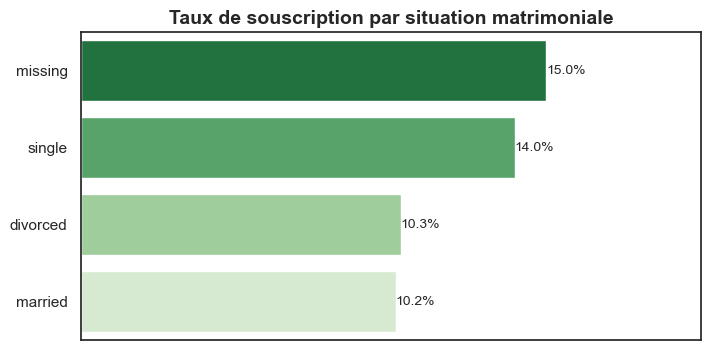

In [11]:
# Configuration du style sans grille
sns.set_theme(style="white")  # Style clair sans grilles

# Taille de la figure
plt.figure(figsize=(8, 4))

# Création d'une palette "Greens" inversée (du vert foncé au clair)
palette = sns.color_palette("Greens", n_colors=len(rate_data))
palette = palette[::-1]  # inverse la liste de couleurs

# Création du barplot
ax = sns.barplot(
    data=rate_data,
    y='marital',
    x='subscription_rate',
    hue='marital',       # Utilisation de la variable 'marital' pour la couleur
    palette=palette,
    legend=False          
)

# Ajout des pourcentages sur les barres
for p in ax.patches:
    ax.annotate(f"{p.get_width()*100:.1f}%",                                       # Texte avec pourcentage formaté
                (p.get_x() + p.get_width(), p.get_y() + p.get_height()/2),         # Position à gauche de la barre
                ha='left', va='center', fontsize=10)                               # Alignement horizontal et vertical, taille du texte

# Titre du graphique avec style gras et taille de police
plt.title('Taux de souscription par situation matrimoniale', fontsize=14, fontweight='bold')

plt.xlabel('')            # Suppression du label de l'axe X
plt.ylabel('')            # Suppression du label de l'axe Y
plt.xlim(0,0.2)           # Limites de l'axe X de 0 à 0.2 (0% à 20%)
plt.xticks([])            # Supprime les valeurs affichées sur l'axe X
plt.show()

**Interprétation**

L’analyse des taux de souscription aux dépôts à terme selon la situation matrimoniale révèle des différences marquées entre les groupes.<br>
Les individus dont la situation matrimoniale est manquante présentent le taux de souscription le plus élevé à 15,0 %, suivis des célibataires à 14,0 %. En revanche, les divorcés et les personnes mariées affichent des taux nettement plus faibles, respectivement 10,3 % et 10,2 %.<br>
Ces résultats suggèrent que les personnes sans engagement conjugal formel ou dont le statut est inconnu manifestent une propension plus élevée à souscrire à ces produits, potentiellement en lien avec des priorités financières ou un niveau d’engagement différent en matière d’épargne.

### Niveau d'études vs Souscription

In [12]:
# Calcul du taux de souscription par niveau d'études
rate_data = (
    data.groupby('education')['y']
    .agg(subscription_rate='mean', effectif='size')  # calcule la moyenne et la taille
    .reset_index()
    .sort_values('subscription_rate', ascending=False)
    .reset_index(drop=True)
)
rate_data

,education,subscription_rate,effectif
0,illiterate,0.222222,18
1,missing,0.144592,1729
2,university.degree,0.137245,12168
3,professional.course,0.113528,5241
4,high.school,0.108367,9514
5,basic.4y,0.102490,4176
6,basic.6y,0.082024,2292
7,basic.9y,0.078120,6042


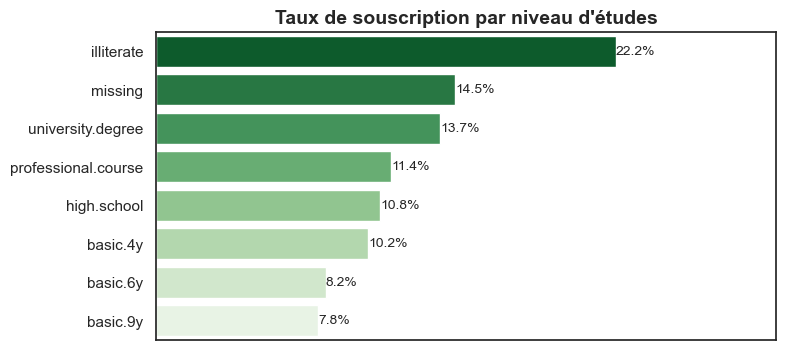

In [13]:
# Configuration du style sans grille
sns.set_theme(style="white")  # Style clair sans grilles

# Taille de la figure
plt.figure(figsize=(8, 4))

# Création d'une palette "Greens" inversée (du vert foncé au clair)
palette = sns.color_palette("Greens", n_colors=len(rate_data))
palette = palette[::-1]  # inverse la liste de couleurs

# Création du barplot
ax = sns.barplot(
    data=rate_data,
    y='education',
    x='subscription_rate',
    hue='education',       # Utilisation de la variable 'education' pour la couleur
    palette=palette,
    legend=False          
)

# Ajout des pourcentages sur les barres
for p in ax.patches:
    ax.annotate(f"{p.get_width()*100:.1f}%",                                       # Texte avec pourcentage formaté
                (p.get_x() + p.get_width(), p.get_y() + p.get_height()/2),         # Position à gauche de la barre
                ha='left', va='center', fontsize=10)                               # Alignement horizontal et vertical, taille du texte

# Titre du graphique avec style gras et taille de police
plt.title('Taux de souscription par niveau d\'études', fontsize=14, fontweight='bold')

plt.xlabel('')            # Suppression du label de l'axe X
plt.ylabel('')            # Suppression du label de l'axe Y
plt.xlim(0,0.3)           # Limites de l'axe X de 0 à 0.3 (0% à 30%)
plt.xticks([])            # Supprime les valeurs affichées sur l'axe X
plt.show()

**Interprétation**

L’analyse des taux de souscription aux dépôts à terme selon le niveau d’éducation révèle des variations significatives.<br>
Le taux de souscription le plus élevé est observé chez les personnes illettrées, avec 22,2 %, suivi par les individus dont le niveau d’éducation est manquant à 14,5 %. En revanche, les détenteurs d’un diplôme universitaire affichent un taux plus modéré de 13,7 %. Les souscriptions diminuent progressivement avec les niveaux d’éducation élémentaires : 10,2 % pour un niveau basique 4 ans, 8,2 % pour 6 ans et 7,8 % pour 9 ans d’éducation élémentaire.<br>
Ces résultats suggèrent une relation inverse entre le niveau d’éducation formelle et la propension à souscrire aux dépôts à terme, ce qui peut traduire des différences dans la perception des produits financiers ou dans les besoins d’épargne.

### Evolution des souscriptions par mois

In [14]:
# Mapping des mois
month_order = {
    'jan': 1, 'feb': 2, 'mar': 3, 'apr': 4,
    'may': 5, 'jun': 6, 'jul': 7, 'aug': 8,
    'sep': 9, 'oct': 10, 'nov': 11, 'dec': 12
}

# Calcul du taux de souscription par mois
rate_data = (
    data.groupby('month')['y']
    .agg(subscription_rate='mean', effectif='size')  # calcule la moyenne et la taille
    .reset_index()
    .sort_values('subscription_rate', ascending=False)
    .reset_index(drop=True)
)

# Ajout d'une colonne avec le numéro de mois pour trier 
rate_data['month_num'] = rate_data['month'].map(month_order)

# Tri selon le numéro du mois
rate_data = rate_data.sort_values('month_num')

rate_data

,month,subscription_rate,effectif,month_num
0,mar,0.505495,546,3
4,apr,0.204787,2632,4
9,may,0.064347,13769,5
6,jun,0.105115,5318,6
8,jul,0.090466,7174,7
5,aug,0.105962,6172,8
2,sep,0.449123,570,9
3,oct,0.437936,717,10
7,nov,0.101463,4100,11
1,dec,0.489011,182,12


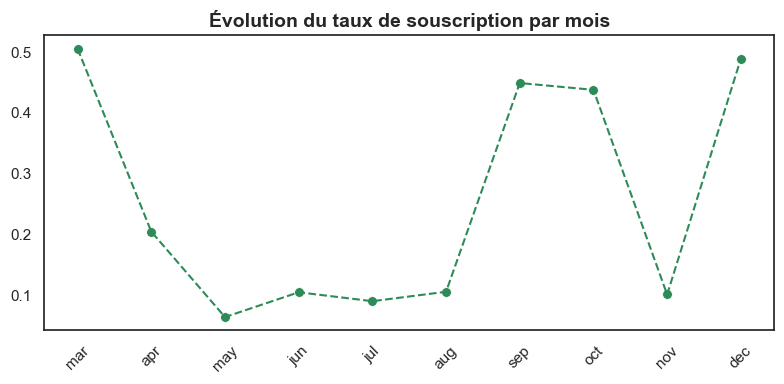

In [15]:
plt.figure(figsize=(8, 4)) # Définir la taille du graphique

# Scatter plot de l'évolution du taux de souscription
sns.scatterplot(
    data=rate_data,
    x='month',
    y='subscription_rate',
    s=50,            # taille des points
    color='seagreen' # couleur des points
)

# Ligne en pointillés reliant les points
sns.lineplot(
    data=rate_data,
    x='month',
    y='subscription_rate',
    color='seagreen',
    linestyle='--', # style de ligne 
    marker=None     # pas de marqueur sur la ligne
)

# Titre du graphique
plt.title("Évolution du taux de souscription par mois", fontsize=14, fontweight='bold')

# Suppression des labels d’axes
plt.xlabel("")
plt.ylabel("")

plt.xticks(rotation=45)  # Rotation des étiquettes de l’axe X pour une meilleure lisibilité
plt.grid(False)          # Suppression de la grille
plt.tight_layout()       # Ajustement automatique des marges
plt.show()

**Interprétation**

L’analyse des taux de souscription aux dépôts à terme selon le mois de contact met en évidence de fortes variations saisonnières.<br>
Les taux les plus élevés sont observés en mars (50,5 %), décembre (48,9 %), septembre (44,9 %) et octobre (43,8 %), traduisant une propension accrue à souscrire à certaines périodes de l’année. Ces pics peuvent coïncider avec des moments clés sur le plan financier (par exemple, fin de trimestre ou d’année, versement de primes, ajustements budgétaires ou offres promotionnelles).<br>
À l’inverse, les mois de mai (6,4 %), juillet (9,04 %), novembre (10,1 %), juin (10,5 %) et août (10,6 %) affichent les taux de souscription les plus faibles, ce qui peut refléter des périodes de moindre disponibilité des clients ou de priorités financières différentes (vacances, dépenses saisonnières, rentrée scolaire).

### Evolution des souscriptions par jour

In [16]:
# Mapping des jours
day_order = {'mon': 1, 'tue': 2, 'wed': 3, 'thu': 4, 'fri': 5}

# Calcul du taux de souscription par jour
rate_data = (
    data.groupby('day_of_week')['y']
    .agg(subscription_rate='mean', effectif='size')  # calcule la moyenne et la taille
    .reset_index()
    .sort_values('subscription_rate', ascending=False)
    .reset_index(drop=True)
)

# Ajout d'une colonne avec le numéro de mois pour trier 
rate_data['day_num'] = rate_data['day_of_week'].map(day_order)

# Tri selon le numéro du mois
rate_data = rate_data.sort_values('day_num')

rate_data

,day_of_week,subscription_rate,effectif,day_num
4,mon,0.099483,8514,1
1,tue,0.117734,8086,2
2,wed,0.116685,8133,3
0,thu,0.121188,8623,4
3,fri,0.108001,7824,5


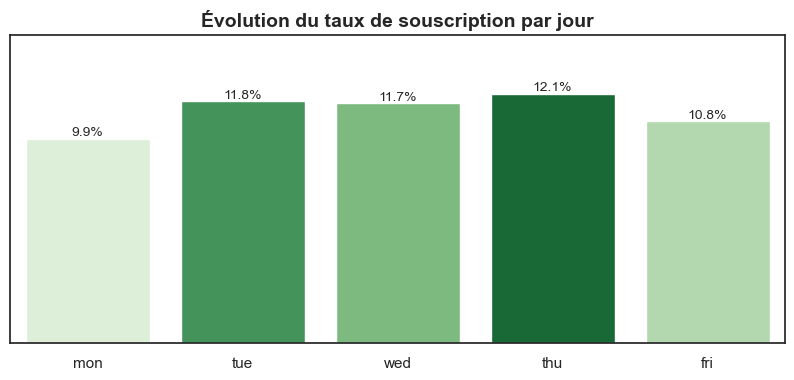

In [17]:
# Configuration du style sans grille
sns.set_theme(style="white")  # Style clair sans grilles

# Taille de la figure
plt.figure(figsize=(10, 4))

# Création d'une palette "Greens" inversée (du vert foncé au clair)
palette = sns.color_palette("Greens", n_colors=len(rate_data))

# Création du barplot
ax = sns.barplot(
    data=rate_data,
    x='day_of_week',
    y='subscription_rate',
    hue='subscription_rate',       # Utilisation de la variable 'subscription_rate' pour la couleur
    palette=palette,
    legend=False          
)

# Ajout des pourcentages sur les barres
for p in ax.patches:
    ax.annotate(f"{p.get_height()*100:.1f}%",                                      # Texte avec pourcentage formaté
                (p.get_x() + p.get_width() / 2, p.get_height()),                   # Position au centre haut de la barre
                ha='center', va='bottom', fontsize=10)                             # Alignement horizontal et vertical, taille du texte

# Titre du graphique avec style gras et taille de police
plt.title('Évolution du taux de souscription par jour', fontsize=14, fontweight='bold')

plt.xlabel('')            # Suppression du label de l'axe X
plt.ylabel('')            # Suppression du label de l'axe Y
plt.ylim(0,0.15)           # Limites de l'axe Y de 0 à 0.15 (0% à 15%)
plt.yticks([])            # Supprime les valeurs affichées sur l'axe Y
plt.show()

**Interprétation**

L’analyse des taux de souscription aux dépôts à terme en fonction du jour de la semaine montre des variations modérées mais significatives.<br>
Le jeudi enregistre le taux le plus élevé avec 12,1 %, suivi de près par le mardi (11,8 %) et le mercredi (11,7 %). Les performances sont légèrement plus faibles le vendredi (10,8 %) et atteignent leur minimum le lundi (9,9 %).<br>
Ces différences peuvent refléter des dynamiques comportementales : en début de semaine, les clients peuvent être moins réceptifs aux sollicitations commerciales, tandis que les milieux de semaine semblent plus propices aux décisions financières.